# Lab3: Interpolación y estimación

La interpolación se basa en aproximar valores de una función utilizando un polinomio algebraico, ya que se aproximan de manera uniforme a las funciones continuas.

Mencionado en el libro **Análisis numérico de Richard Burden**:

>>
Una razón de su importancia es que se aproximan de manera uniforme a las funciones continuas. Con esto queremos decir que dada una una función, definida y continua sobre un intervalo cerrado y acotado, existe un polinomio que está tan “cerca” de la función dada como se desee.
>>

## 1: Lagrange

Programar una función que evalúe el polinomio interpolante *p* usando la forma de Lagrange.

Según el libro **Análisis numérico de Richard Burden**:
>>
El problema de determinar un polinomio de grado que pasa por diferentes puntos $ (x_0, y_0) $ y $ (x_1, y_1) $ es igual a aproximar una función $ f $ para la que $ f(x_0) = y_0 $ y $ f(x_1) = y_1 $ por medio de un polinomio de primer grado que se **interpola**, o que coincida con los valores de $ f $ en los puntos determinados. El uso de estos polinomios para aproximación dentro del intervalo determinado mediante puntos finales recibe el nombre de **interpolación**.
Dadas las funciones: 
    $$ L_0(x) = {x - x_1}\over{x_0 - x_1} $$ $$ L_1(x) = {x - x_0}\over{x_1 - x_0} $$
El **polinomio de interpolación de Lagrange** lineal a través de $ (x_0, y_0) $ y $ (x_1, y_1) $ es:
    $$ P(x) = L_0(x)f(x_0) + L_1(x)f(x_1) $$
>>

La función debe tener como entrada $ (x, y, z) $ donde $ (x, y) \in \mathbb R^n $ son las coordenadas de los pares a interpolar y $ z \in \mathbb R^m $ son los valores para evaluar $ p $. La salida debe ser $ w \in \mathbb R^m $ tal que $ w_j = p(z_j) $.

In [1]:
import numpy as np

def ilagrange(x_val, y_val, z_val):
    assert len(x_val) == len(y_val), 'x and y must have the same lenght'
    
    # define the L_k function
    def L(k, x):
        # define the x's without the x_k
        _x_val = [x for i, x in enumerate(x_val) if i != k]
        # numerator (using x = z_i)
        num = [(x - x_i) for x_i in _x_val]
        # denominator (using x_k)
        den = [(x_val[k] - x_i) for x_i in _x_val]
        return np.prod(num)/np.prod(den)
    
    # define the polynomial
    def P(x):
        # the sum L_k(x)*f(x_i)
        s = [L(k, x)*y for k, y in enumerate(y_val)]
        return sum(s)
    
    w = [P(z) for z in z_val]
    return w

Probamos la interpolación de Lagrange usando dos puntos $ (-1, 0), (0, 1), (1, 2), (2, 0) $.

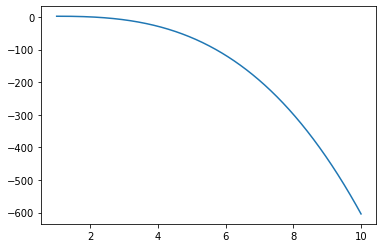

In [2]:
import matplotlib.pyplot as plt

x = [-1, 0, 1, 2]
y = [1, 1, 2, 0]
z = np.linspace(1, 10, 500)

w = ilagrange(x, y, z)

plt.plot(z, w)
plt.show()

## 2: Método de diferencias dividas de Newton

Utilizar el método de Newton del polinomio interpolante, calculando los coeficientes mediante diferencias divididas.

Según el libro **Análisis numérico de Richard Burden**:

$$ P(x) = a_0 + \sum_{j=1}^n a_j g_j(x) $$

dónde se define $ g_j(x) $ como

$$ g_j(x) = \prod_{i=0}^{j-1} (x - x_i) $$

y $ a_j $ como

$$ a_0 = f[x_0]; a_j = f[x_0,\dots,x_j ] $$

donde se define $ f[x_{i},\dots,x{k] $ como

$$ f[x_i] = f(x_i); f[x_i,\dots,x_{k}] = {{f[x_{i+1},\dots,x_{k}] - f[x_i,\dots,x_{k-1}]}\over{x_{k} - x{i}}} $$

Esta definición podría llegar a requerir que se use recursión, por lo que se podría simplificar el proceso, buscando los coeficientes $ F_{i, j} $ utilizando un array para guardar los valores de base e intermedios.

In [25]:
import numpy as np

def inewton(x_val, y_val, z_val):
    assert len(x_val) == len(y_val), 'x and y must have the same lenght'
    x_val = np.array(x_val, np.float32)
    y_val = np.array(y_val, np.float32)
    m = len(x_val)
    n = m - 1
    
    # define the matrix F: n x n
    F = np.copy(y_val)
    for k in range(1, m):
        num = (F[k:m] - F[k - 1])
        den = (x_val[k:m] - x_val[k - 1])
        F[k:m] = num / den
    
    # define the polynomial
    def P(x):
        p = F[n]
        for k in range(1, m):
            p = F[n - k] + (x - x_val[n - k])*p
        return p
    
    w = [P(z) for z in z_val]
    return w

Probamos la interpolación de Lagrange usando dos puntos $ (-1, 0), (0, 1), (1, 2), (2, 0) $.

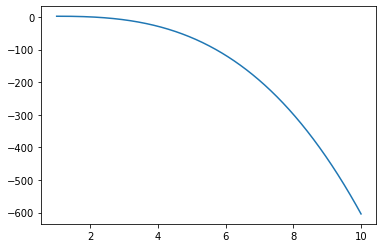

In [26]:
import matplotlib.pyplot as plt

x = [-1, 0, 1, 2]
y = [1, 1, 2, 0]
z = np.linspace(1, 10, 500)
w = inewton(x, y, z)

plt.plot(z, w)
plt.show()

## 3: Gráfico de interpolación

Considerar la función $ f(x) = 1 / x $. Utilizando el ejercicio anterior, graficar en una misma figura $ f $ y $ p $ que interpole $ \{(i, f(i)\}_{i=1}^5 $, usando para ambas los puntos equiespaciados $ z_j = 24/25 + j/25, j = 1,\dots,101 $.

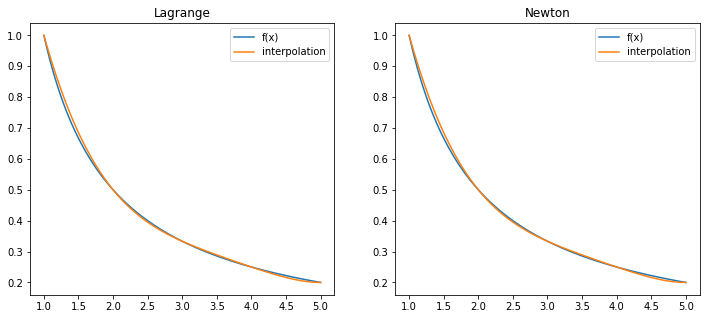

In [35]:
import matplotlib.pyplot as plt

def f(x):
    return 1/x

# define the space
z_val = [(24/25) + (j/25) for j in range(1, 102)]
f_val = [f(z) for z in z_val]

# value for interpolation
x_val = range(1, 6)
y_val = [f(x) for x in x_val]

# lagrange interpolation
lagrange_w_val = ilagrange(x_val, y_val, z_val)

# newton interpolation
newton_w_val = inewton(x_val, y_val, z_val)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].set_title('Lagrange')
ax[0].plot(z_val, f_val, label='f(x)')
ax[0].plot(z_val, lagrange_w_val, label='interpolation')
ax[0].legend()

ax[1].set_title('Newton')
ax[1].plot(z_val, f_val, label='f(x)')
ax[1].plot(z_val, newton_w_val, label='interpolation')
ax[1].legend()

plt.show()

## 4: Visualizar interpolación con distintos pares

Considerar la función $ f $ tal que $ f(x) = 1 / (1 + 25x^2) $. Graficar $ f $ y $ p_n $ en una misma figura, usando 200 puntos igualmente espaciados en el intervalo $ [-1, 1] $ donde $ p_n $ es el polinomio que interpola los pares:

$$ \{(x_i, f(x_i)^{n+1}_{i=1} : x_i = 2(i - 1)/n, i = 1,\dots,n+1 \} $$

Variar $ n $ entre 1 y 15. Generar los 15 gráficos.

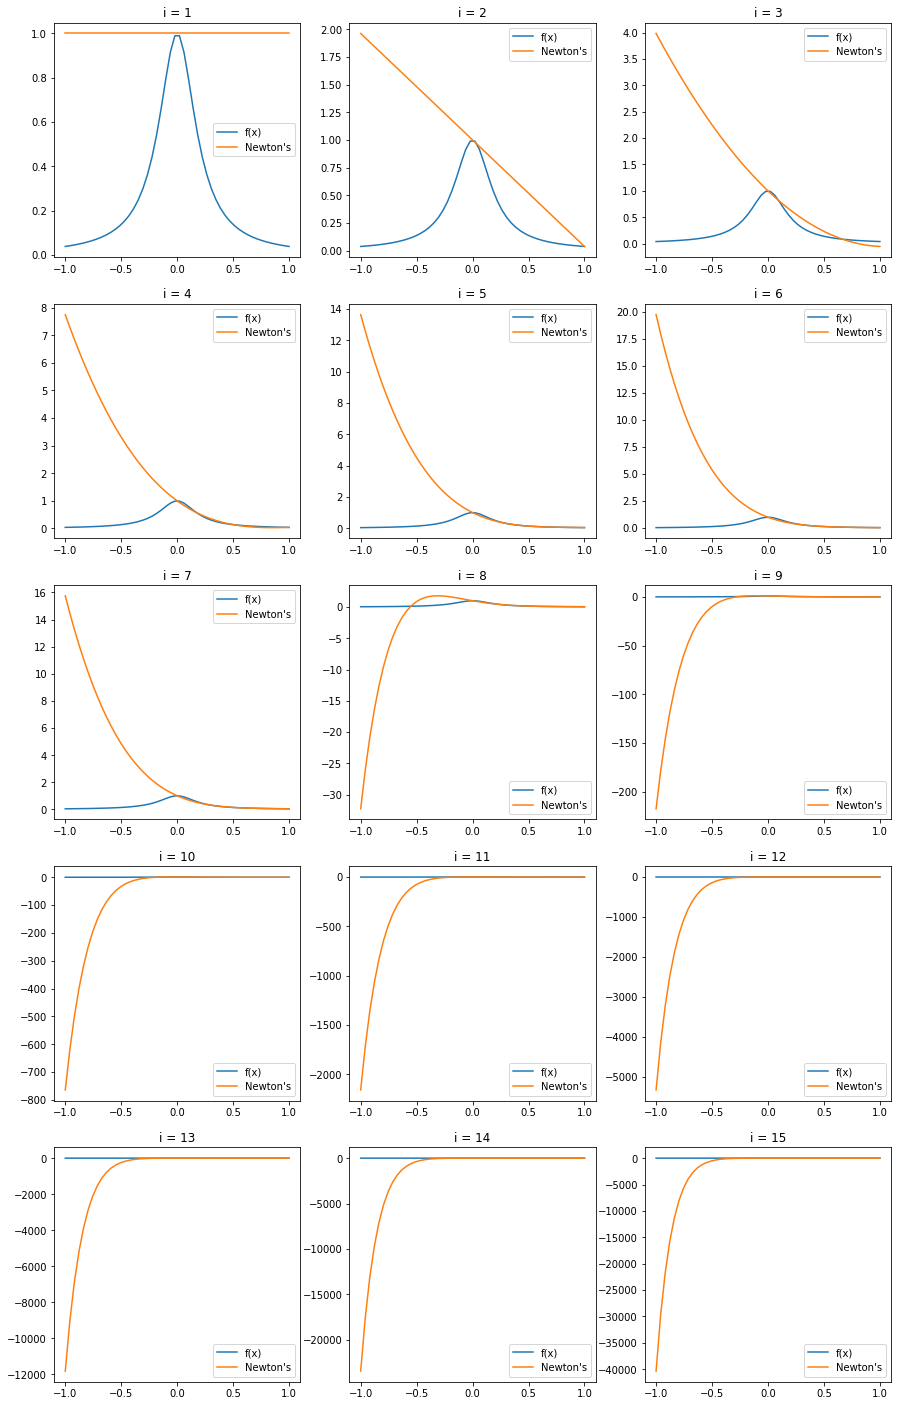

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# define f
def f(x):
    return 1/(1 + 25*pow(x, 2))

# define a function for x data
def get_x_data(n):
    return [(2*(i - 1))/n for i in range(1, n+1)]

# the space in which to interpolate
z_space = np.linspace(-1, 1)

# plot

n = 15
# create subplot with 5 rows and 3 cols
fig, ax = plt.subplots(int(n/3), 3, figsize=(15, n/3 * 5))
ax = ax.ravel()

# plot all the data for all the plots
for i in range(1, n+1):
    j = i - 1
    ax[j].set_title(f'i = {i}')
    
    # plot original function
    ax[j].plot(z_space, [f(z) for z in z_space], label='f(x)')
    
    # get x & y data
    x_data = get_x_data(i)
    y_data = [f(x) for x in x_data]
    
    # plot newton's interpolation
    newton_w = inewton(x_data, y_data, z_space)
    ax[j].plot(z_space, newton_w, label='Newton\'s')

    ax[j].legend()

plt.show()

## 5: Estimación spline cúbico

Cargar el archivo **datos_aeroCBA.dat** de [esta página](https://www.tutiempo.net/clima/ws-873440.html), contiene la temperatura media anual registrados en el aeropuerto de Córdoba.

Mediante un spline cúbico, calcular los valores faltantes y graficar.

Observación: en algunos casos será necesario extrapolar.

Comenzemos leyendo los datos:

In [58]:
import numpy as np
import pandas as pd

historicos = pd.read_csv('cba_aerodrome/cba_aerodrome_historicos.csv', sep='\t')
historicos.head()

,Año,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR
0,1957,-,-,-,-,-,-,-,-,-,-,-
1,1958,17.3,24.3,11.2,-,12.3,73,0,26,9,0,0
2,1965,-,-,-,-,-,-,-,-,-,-,-
3,1967,-,-,-,-,-,-,-,-,-,-,-
4,1968,17.9,24.5,11.6,-,13.1,82,0,42,19,0,2


In [63]:
ref = pd.read_csv('cba_aerodrome/cba_aerodrome_ref.csv', sep='\t', header=None)
ref.head()

,0,1
0,T,Temperatura media anual
1,TM,Temperatura máxima media anual
2,Tm,Temperatura mínima media anual
3,PP,Precipitación total anual de lluvia y/o nieve ...
4,V,Velocidad media anual del viento (Km/h)


Ahora que tenemos los datos, comenzemos a analizar el concepto de **spline cúbico**. Se basa en encontrar $ n $ polinomios cúbicos, llamados $ S_j $ con $ j = 1,\dots\,n $ en el subintervalo $ [x_j, x_{j+1}] $ (por ende tendremos n subintervalos), que cumplan con:

- $ S_j(x_j) = f(x_j) $ y $ S_j(x_{j+1}) = f(x_{j+1}) $
- Se cumple $ S_{j+1}(x_{j+1}) = S_j(x_{j+1}) $ tanto para $ S $ como para $ S' $ como para $ S'' $
- uno de los siguientes se cumple:
    - $ S''(x_0) = S''(x_n) = 0 $ (frontera natural)
    - $ S''(x_0) = f(x_0) $ y $ S''(x_n) = f(x_n) $ (frontera condicionada)
    
Para lograr usar el spline cúbico en los datos que tenemos, tenemos que comenzar por definir la función que queremos usar.